In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gameMain(cop_mem, alive_mem, incr_per, dcr_per): #이 외의 실험의 7가지 조건 내용이 들어간 gameMain
    global mafia_num, bystander_num, cop_num, medic_num
    
    alive_list=[] 
    
    for bystander in range(bystander_num): 
        alive_list.append(1)
    for medic in range(medic_num):
        alive_list.append(2)
    for cop in range(cop_num):
        alive_list.append(3)
    for mafia in range(mafia_num):
        alive_list.append(4)

    pick_per=[2 for i in range(len(alive_list))]
    #죽을 확률(가중치)은 모두 동일하게 시작(2)
    
    cop_check=[0 for i in range(len(alive_list))]
    
    for player_type in range(len(alive_list)):
        if(alive_list[player_type]==3):
            cop_check[player_type]=1
            
    mafia_info=[1 for i in range(len(alive_list))] 
    #마피아가 저녁에 죽을 사람을 고를 리스트
    #하룻밤이 지나면 경찰은 밝혀지기 때문에 해당 리스트에는 경찰의 가중치만 바뀜 
    #(여기서 메딕은 마피아가 알 방법이 없음)
    medic_info=[2 for i in range(len(alive_list))] 
    #메딕이 저녁에 살릴 사람을 고를 리스트
    #가중치 : (경찰=4, 메딕=3, 일반시민=2, 마피아=1)
    for player_type in range(len(alive_list)):
        if(alive_list[player_type]==4): #마피아 본인이면 가중치 0
            mafia_info[player_type]=0
        if(alive_list[player_type]==2): #메딕 본인이면 가중치 3
            medic_info[player_type]=3
    
    result=0 
    while(1):
        result=stateCheck()
        if(result!=0):
            break
        day(alive_list, pick_per, cop_check, cop_mem, alive_mem, mafia_info, medic_info) 
        result=stateCheck()
        if(result!=0):
            break
        night(alive_list, pick_per, cop_check, cop_mem, incr_per, dcr_per, mafia_info, medic_info)
        
    return result

In [3]:
def stateCheck(): #이 외의 실험의 7가지 조건 내용이 들어간 stateCheck(기존과 다른 것 없음)
    global mafia_num, bystander_num, cop_num, medic_num
    if(mafia_num==0):
        return 1
    elif(bystander_num+cop_num+medic_num<=mafia_num):
        return 2
    else:
        return 0

In [4]:
def day(alive_list, pick_per, cop_check, cop_mem, alive_mem, mafia_info, medic_info): #이 외의 실험의 7가지 조건 내용이 들어간 day
    #기존 day에서 마피아가 저녁에 죽을 사람 고를 리스트와 메딕이 저녁에 살릴 사람 고를 리스트를 인자로 추가
    global mafia_num, bystander_num, cop_num, medic_num, Day
    Day+=1 #첫 날인지 확인하기 위한 변수
    new_cop=True #기존에 조사결과를 밝히던 경찰이 죽고 새로운 경찰이 등장해야하는가
    if(Day!=1): #첫 날이 아니라면, (경찰은 조사를 한 상태)
        for i in range(len(alive_list)):
            if(mafia_info[i]==2): #기존 경찰이 살아있다면
                new_cop=False #mafia_info는 그대로 유지됨(실제라면 경찰은 한명씩만 밝힐거임->그래야 오래 살아남으니까..)
                break
        if(new_cop==True): #만약 기존 경찰이 죽었다면
            if(cop_num>0): #경찰이 남은 경우
                curr_cop=random.randint(1, cop_num) #새로 등장할 경찰 뽑기
                mafia_info[bystander_num+medic_num+curr_cop-1]=2 #새로운 경찰을 mafia_info에 가중치 2로 저장
                medic_info[bystander_num+medic_num+curr_cop-1]=4 #새로운 경찰을 medic_info에 가중치 4로 저장
        
        for i in range(len(pick_per)):#경찰의 조사 결과가 담긴 리스트(pick_per)를 돌아 보며
            if(pick_per[i]==3): #마피아가 발각되었다면
                medic_info[i]=1 #medic_info에 해당 플레이어 가중치 1로 저장(마피아)
                
                
    killed=random.choices([i for i in range(len(pick_per))], weights=pick_per, k=1)[0]
    
    player_type=alive_list.pop(killed)
    pick_per.pop(killed)
    cop_check.pop(killed)
    mafia_info.pop(killed)
    medic_info.pop(killed)
    
    if(player_type==1):
        bystander_num-=1
    elif(player_type==2):
        medic_num-=1
    elif(player_type==3):
        cop_num-=1
    elif(player_type==4):
        mafia_num-=1
        
    if(cop_mem==False):
        for i in range(len(alive_list)):
            cop_check[i]=0
        for player_type in range(len(alive_list)):
            if(alive_list[player_type]==3):
                cop_check[player_type]=1
               
    if((cop_mem==False) and (alive_mem==False)):
        for i in range(len(alive_list)):
            pick_per[i]=2
    
    if((cop_num==0) and (alive_mem==False)):
        for i in range(len(alive_list)):
            pick_per[i]=2

In [5]:
def night(alive_list, pick_per, cop_check, cop_mem, incr_per, dcr_per, mafia_info, medic_info): #이 외의 실험의 7가지 조건 내용이 들어간 night
    #기존 night에서 마피아가 저녁에 죽을 사람 고를 리스트와 메딕이 저녁에 살릴 사람 고를 리스트를 인자로 추가
    #경찰이 조사결과 해당 플레이어가 시민일 경우, 낮춰줄 가중치 dcr_per도 인자로 추가
    global mafia_num, bystander_num, cop_num, medic_num
    
    killed=random.choices([i for i in range(len(mafia_info))], weights=mafia_info, k=1)[0]
    #마피아는 가중치 고려해 무작위로 죽일 사람 선택
    
    cure=-1
    if(medic_num>0):
        cure=random.choices([i for i in range(len(medic_info))], weights=medic_info, k=1)[0]
        #메딕은 가중치 고려해 무작위로 살릴 사람 선택
        if(killed!=cure):
            cure=-1
    #마피아가 선택한 사람과 메딕이 선택한 사람이 같지 않을 시, 죽임
    if(cure==-1):
        player_type=alive_list.pop(killed)
        pick_per.pop(killed)
        cop_check.pop(killed)
        mafia_info.pop(killed)
        medic_info.pop(killed)
        if(player_type==1):
            bystander_num-=1
        elif(player_type==2):
            medic_num-=1
        elif(player_type==3):
            cop_num-=1
    
    if(cop_num>0):
    #경찰은 조사상태X인 사람 중 무작위로 조사할 사람 선택
        yet=0
        for i in cop_check:
            if(i==0): 
                yet+=1
        if(yet==0):
            pass
        else:
            check=random.randint(0, yet-1)

            idx=0
            num=0
            while(num<=check):
                if(cop_check[idx]==0):
                    num+=1
                idx+=1
            
            cop_check[idx-1]=1
            if(alive_list[idx-1]==4): #조사한 사람이 마피아라면
                pick_per[idx-1]=incr_per #가중치 올리고
            elif(alive_list[idx-1]==1 or alive_list[idx-1]==2): #조사한 사람이 일반시민이거나 메딕이라면
                pick_per[idx-1]=dcr_per #가중치 낮춰줌

In [6]:
#이 외의 실험에서 제시한 조건들을 적용한 마피아 게임(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num, Day = 0, 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list=[]
show=[]

for bystander in range(6,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-6
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=3
        medic_num=3
        result=gameMain(True, True, 3, 1)
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list.append(average)
    show.append([str(bystander)+"명", average])
print(show)

[['6명', 0.804], ['7명', 0.788], ['8명', 0.708], ['9명', 0.721], ['10명', 0.627], ['11명', 0.621], ['12명', 0.57], ['13명', 0.618], ['14명', 0.541], ['15명', 0.543], ['16명', 0.512], ['17명', 0.481], ['18명', 0.477], ['19명', 0.475], ['20명', 0.426], ['21명', 0.423], ['22명', 0.413], ['23명', 0.416], ['24명', 0.365], ['25명', 0.421], ['26명', 0.342], ['27명', 0.37], ['28명', 0.324], ['29명', 0.377], ['30명', 0.331], ['31명', 0.333], ['32명', 0.289], ['33명', 0.343], ['34명', 0.284], ['35명', 0.306], ['36명', 0.316], ['37명', 0.261], ['38명', 0.262], ['39명', 0.275], ['40명', 0.259], ['41명', 0.259], ['42명', 0.243], ['43명', 0.275], ['44명', 0.245], ['45명', 0.273], ['46명', 0.214], ['47명', 0.252], ['48명', 0.216], ['49명', 0.265], ['50명', 0.233], ['51명', 0.235], ['52명', 0.234], ['53명', 0.233], ['54명', 0.218], ['55명', 0.214], ['56명', 0.188], ['57명', 0.221], ['58명', 0.195], ['59명', 0.205], ['60명', 0.201], ['61명', 0.209], ['62명', 0.182], ['63명', 0.2], ['64명', 0.173], ['65명', 0.195], ['66명', 0.163], ['67명', 0.175], ['68명', 0.171],

Text(0, 0.5, 'mafia win rate')

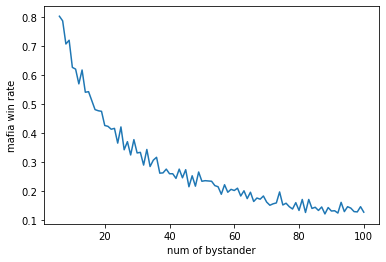

In [7]:
#이 외의 실험에서 제시한 조건들을 적용했을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list=[]

for i in range(6,101):
    bystander_list.append(i)
    
bystander_nlist=pd.Series(bystander_list)
mafia_rate=pd.Series(average_list)

fig,ax=plt.subplots()
ax.plot(bystander_nlist, mafia_rate)
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

In [8]:
def gameMain_org(cop_mem, alive_mem, incr_per): #기존 gameMain과 동일(STAT2021_PR1_20201786.ipynb에 있는 gameMain)
    global mafia_num, bystander_num, cop_num, medic_num
    
    alive_list=[] 
    
    for bystander in range(bystander_num): 
        alive_list.append(1)
    for medic in range(medic_num): 
        alive_list.append(2)
    for cop in range(cop_num):
        alive_list.append(3)
    for mafia in range(mafia_num): 
        alive_list.append(4)

    pick_per=[1 for i in range(len(alive_list))]
    
    cop_check=[0 for i in range(len(alive_list))]
    for player_type in range(len(alive_list)):
        if(alive_list[player_type]==3):
            cop_check[player_type]=1
    
    result=0 
    while(1):
        result=stateCheck_org()
        if(result!=0):
            break
        day_org(alive_list, pick_per, cop_check, cop_mem, alive_mem)
        result=stateCheck_org()
        if(result!=0):
            break
        night_org(alive_list, pick_per, cop_check, cop_mem, incr_per)
        
    return result

In [9]:
def stateCheck_org():  #기존 stateCheck과 동일(STAT2021_PR1_20201786.ipynb에 있는 stateCheck)
    global mafia_num, bystander_num, cop_num, medic_num
    if(mafia_num==0):
        return 1
    elif(bystander_num+cop_num+medic_num<=mafia_num):
        return 2
    else:
        return 0

In [10]:
def day_org(alive_list, pick_per, cop_check, cop_mem, alive_mem):  #기존 day와 동일(STAT2021_PR1_20201786.ipynb에 있는 day)
    global mafia_num, bystander_num, cop_num, medic_num
 
    killed=random.choices([i for i in range(len(pick_per))], weights=pick_per, k=1)[0]
    
    player_type=alive_list.pop(killed)
    pick_per.pop(killed)
    cop_check.pop(killed)
    
    if(player_type==1):
        bystander_num-=1
    elif(player_type==2):
        medic_num-=1
    elif(player_type==3):
        cop_num-=1
    elif(player_type==4):
        mafia_num-=1
        
    if(cop_mem==False):
        for i in range(len(alive_list)):
            cop_check[i]=0
        for player_type in range(len(alive_list)):
            if(alive_list[player_type]==3):
                cop_check[player_type]=1
               
    if((cop_mem==False) and (alive_mem==False)):
        for i in range(len(alive_list)):
            pick_per[i]=1
    
    if((cop_num==0) and (alive_mem==False)):
        for i in range(len(alive_list)):
            pick_per[i]=1

In [11]:
def night_org(alive_list, pick_per, cop_check, cop_mem, incr_per): #기존 night과 동일(STAT2021_PR1_20201786.ipynb에 있는 night)
    global mafia_num, bystander_num, cop_num, medic_num
    
    killed=random.randint(0, bystander_num+cop_num+medic_num-1)
    
    cure=-1
    if(medic_num>0):
        cure=random.randint(0, len(alive_list)-1)
        if(killed!=cure):
            cure=-1

    if(cure==-1):
        player_type=alive_list.pop(killed)
        pick_per.pop(killed)
        cop_check.pop(killed)
        if(player_type==1):
            bystander_num-=1
        elif(player_type==2):
            medic_num-=1
        elif(player_type==3):
            cop_num-=1
    
    if(cop_num>0):
        yet=0
        for i in cop_check:
            if(i==0): 
                yet+=1
        if(yet==0):
            pass
        else:
            check=random.randint(0, yet-1)

            idx=0
            num=0
            while(num<=check):
                if(cop_check[idx]==0):
                    num+=1
                idx+=1
            
            cop_check[idx-1]=1
            if(alive_list[idx-1]==4):
                pick_per[idx-1]=incr_per

In [12]:
#가장 단순한 마피아 게임(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰) (STAT2021_PR1_20201786.ipynb에 있는 첫번째 실험과 동일)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list_org=[]
show_org=[]

for bystander in range(1,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander
        mafia_num=3
        cop_num=0
        medic_num=0
        result=gameMain_org(False, False, 2)
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list_org.append(average)
    show_org.append([str(bystander)+"명", average])
print(show_org)

[['1명', 1.0], ['2명', 1.0], ['3명', 1.0], ['4명', 0.935], ['5명', 0.972], ['6명', 0.894], ['7명', 0.926], ['8명', 0.831], ['9명', 0.887], ['10명', 0.789], ['11명', 0.87], ['12명', 0.751], ['13명', 0.839], ['14명', 0.728], ['15명', 0.799], ['16명', 0.714], ['17명', 0.763], ['18명', 0.664], ['19명', 0.745], ['20명', 0.631], ['21명', 0.757], ['22명', 0.648], ['23명', 0.693], ['24명', 0.589], ['25명', 0.682], ['26명', 0.592], ['27명', 0.669], ['28명', 0.585], ['29명', 0.643], ['30명', 0.563], ['31명', 0.648], ['32명', 0.542], ['33명', 0.638], ['34명', 0.513], ['35명', 0.596], ['36명', 0.516], ['37명', 0.633], ['38명', 0.533], ['39명', 0.575], ['40명', 0.521], ['41명', 0.564], ['42명', 0.491], ['43명', 0.593], ['44명', 0.473], ['45명', 0.585], ['46명', 0.471], ['47명', 0.565], ['48명', 0.468], ['49명', 0.521], ['50명', 0.469], ['51명', 0.568], ['52명', 0.446], ['53명', 0.516], ['54명', 0.446], ['55명', 0.518], ['56명', 0.44], ['57명', 0.51], ['58명', 0.436], ['59명', 0.527], ['60명', 0.407], ['61명', 0.501], ['62명', 0.403], ['63명', 0.484], ['64명', 0

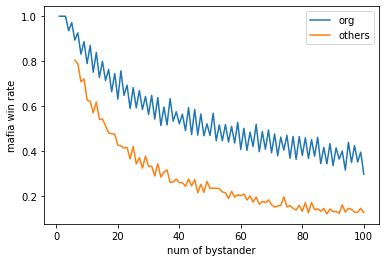

In [13]:
#이 외의 실험 1~7의 조건을 추가했을 때, 1-1실험의 마피아의 승률 분포 그래프 (org=1-1실험, others=이 외의 실험)
bystander_list_org=[]

for i in range(1,101):
    bystander_list_org.append(i)
    
bystander_nlist_org=pd.Series(bystander_list_org)
mafia_rate_org=pd.Series(average_list_org)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_org, mafia_rate_org, label='org')
ax.plot(bystander_nlist, mafia_rate, label='others')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [14]:
#이 외의 실험 1~7의 조건을 추가했을 때, 1-1실험의 마피아의 승률 DataFrame (org=1-1실험, others=이 외의 실험)
df=pd.DataFrame(show_org[5:], columns=['시민의 수', '마피아의 평균 승률(org)'])
df['마피아의 평균 승률(others)']=mafia_rate
df

,시민의 수,마피아의 평균 승률(org),마피아의 평균 승률(others)
0,6명,0.894,0.804
1,7명,0.926,0.788
2,8명,0.831,0.708
3,9명,0.887,0.721
4,10명,0.789,0.627
...,...,...,...
90,96명,0.349,0.140
91,97명,0.424,0.128
92,98명,0.351,0.127
93,99명,0.395,0.145
